In [1]:
from getpass import getpass

admin_rdm_url = 'https://admin.bh.rdm.yzwlab.com/' #'https://admin.staging.rdm.example.com/'
idp_name_1 = None # 'GakuNin RDM IdP'
idp_username_1 = None
idp_password_1 = None
default_result_path = None
close_on_fail = False
transition_timeout = 30000
# 検索用ユーザ情報
search_user_name = 'Satoshi Yazawa'
search_user_by_id = 'jbgaz'
search_user_by_name = 'Satoshi'
search_user_by_email = 'satoshiyazawa9@example.com'

In [2]:
if idp_username_1 is None:
    idp_username_1 = input(prompt=f'Username for {idp_name_1}')
if idp_password_1 is None:
    idp_password_1 = getpass(prompt=f'Password for {idp_username_1}@{idp_name_1}')
(len(idp_username_1), len(idp_password_1))

# 定期監視-管理者-ユーザ管理

- サブシステム名: 管理者
- ページ/アドオン: 管理者
- 機能分類: ログイン
- シナリオ名: ログイン確認
- 用意するテストデータ: URL一覧、アカウント(管理者ユーザー1: GRDM)


## GakuNin RDM管理者ページのURLを開く

①ブラウザを開き、画面右上の設定メニューから「シークレットモードで開く」を選択する。  
②新規画面が開かれ、画面上において、「シークレットモードです」と表示されていることを確認する。
以下、シークレットモードにて確認を行う。


In [3]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/tmp/tmpnx_qts2u'

In [17]:
import importlib
import pandas as pd

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *
from scripts import grdm

await init_pw_context(close_on_fail=close_on_fail, last_path=default_result_path)

('20250420-221757', '/tmp/tmpesr10c9r')

Start epoch: 1745187477.9707463 seconds


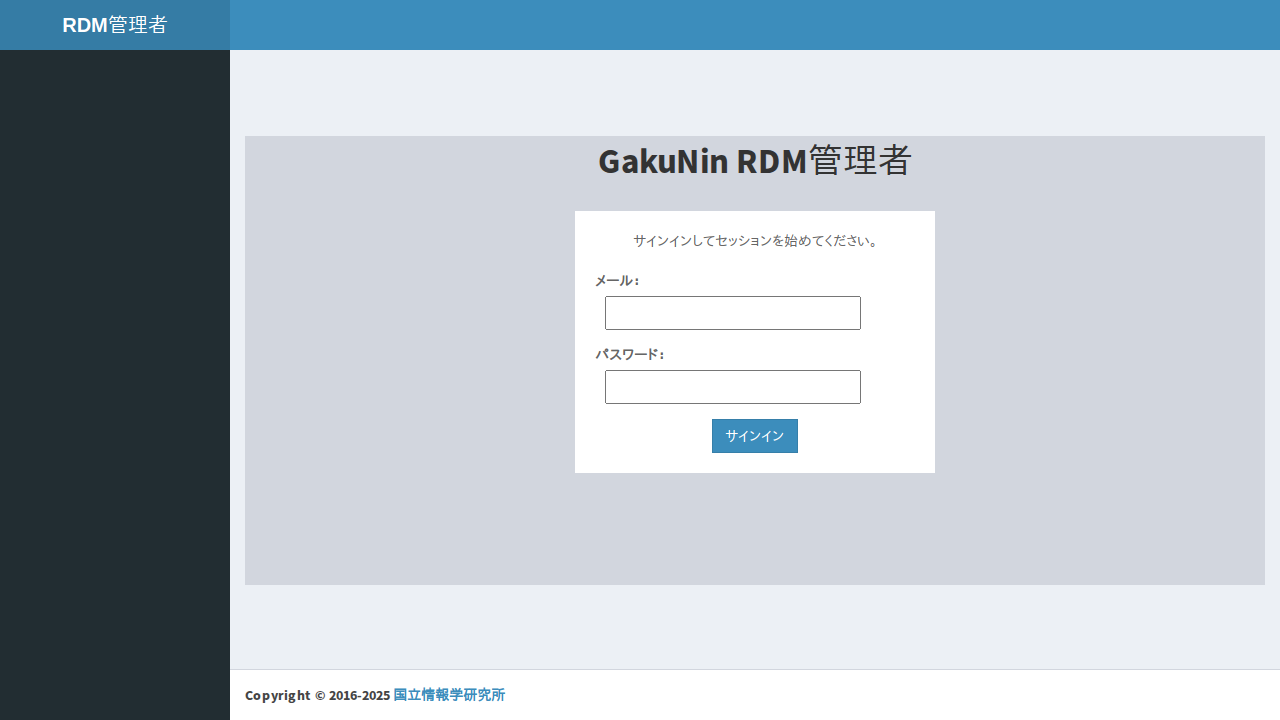

In [18]:
import time

async def _step(page):
    await page.goto(admin_rdm_url)

    await expect(page.locator('.login-logo')).to_be_visible(timeout=30000)

await run_pw(_step)

## ログイン情報を用いてGakuNin RDMにログインする

(IdPに関するログイン情報が与えられた場合、)
GakuNin Embeded DSのプルダウンを展開し、IdPリストから指定されたIdPを選択する。その後、アカウントのID/Passwordを入力して「Login」ボタンを押下する。

(IdPが指定されていない場合、)
CASのログイン操作を実施する。

Start epoch: 1745187480.547807 seconds


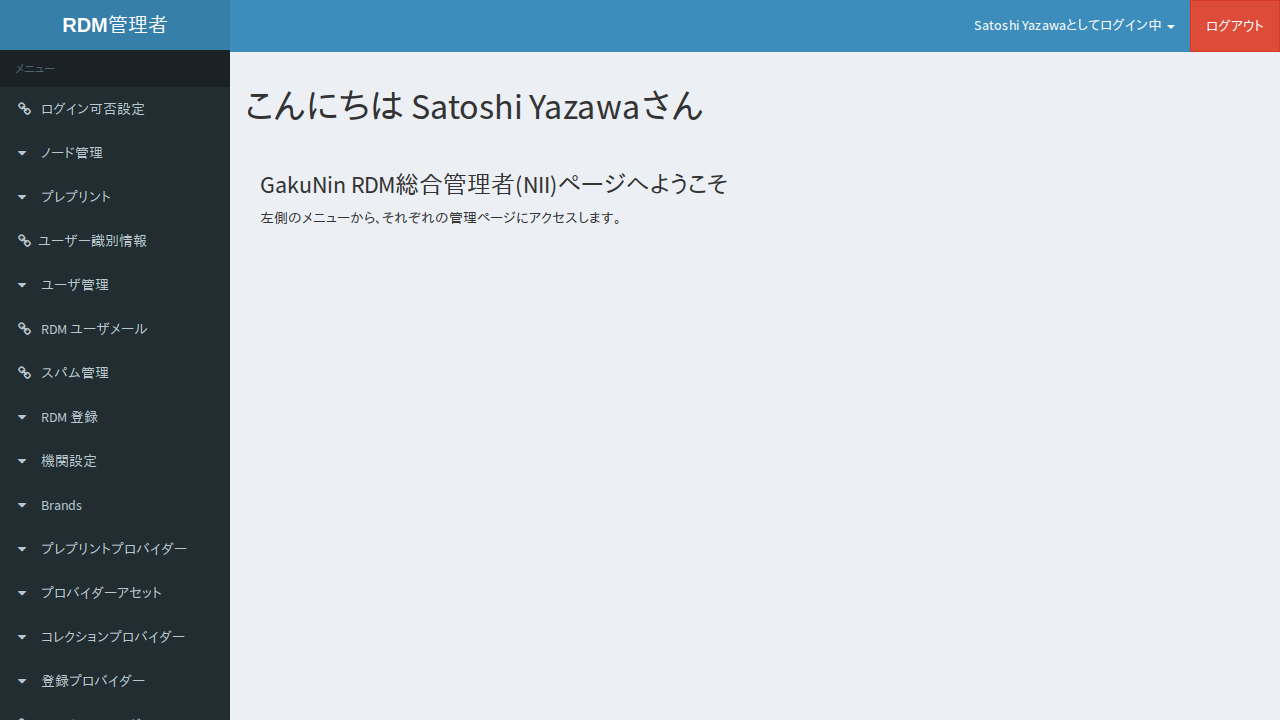

In [19]:
import scripts.grdm
importlib.reload(scripts.grdm)

async def _step(page):
    await scripts.grdm.login_as_admin(
        page, idp_name_1, idp_username_1, idp_password_1, transition_timeout=transition_timeout
    )

    await expect(page.locator('//*[contains(@class, "btn-danger") and contains(text(), "ログアウト")]')).to_be_enabled(timeout=transition_timeout)

await run_pw(_step)

## 「ユーザ管理」から「ユーザ管理」を選択する。

「ユーザ検索」画面が表示される

Start epoch: 1745187481.316395 seconds


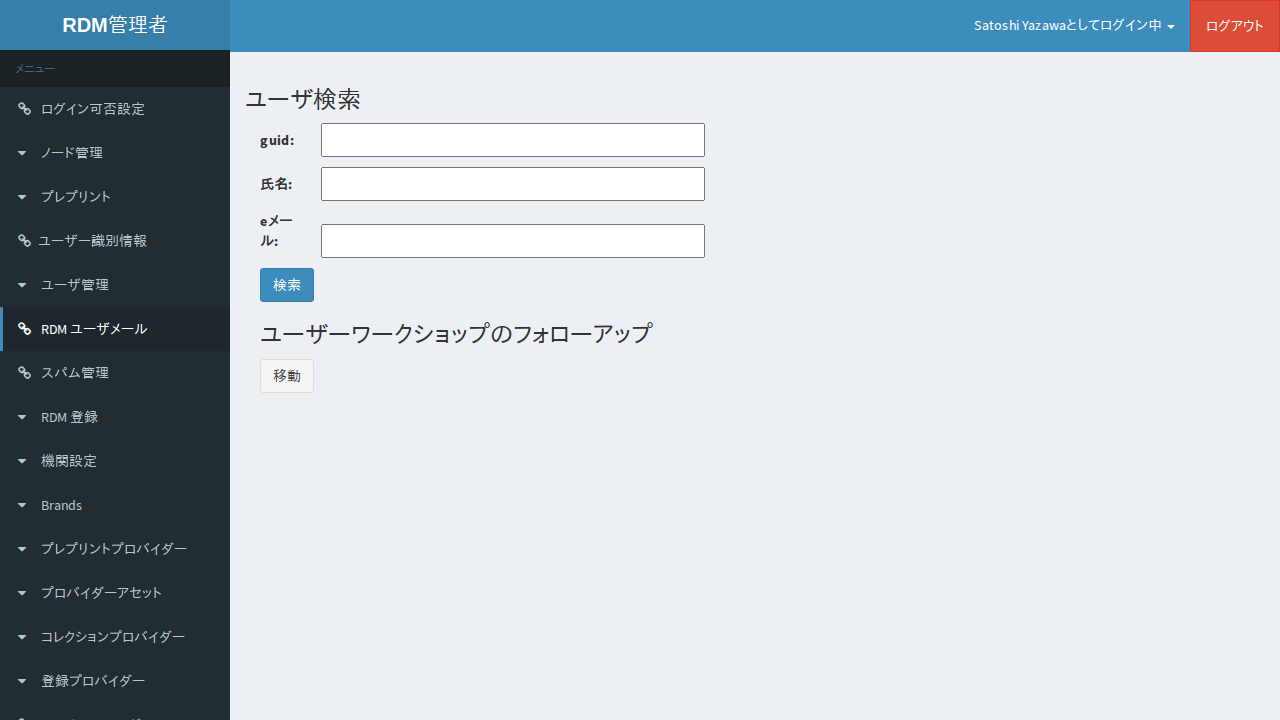

In [20]:
async def _step(page):
    await page.locator('//a[@href = "#collapseUsers"]').click()
    await page.locator('//a[@href = "/users/"]').click()

    await expect(page.locator('//input[@name = "guid"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 「ユーザ検索」画面のGUID欄へ (実在するユーザーID) と入力し、「検索」ボタンを押下する

該当のユーザーが表示される。

Start epoch: 1745187481.777943 seconds


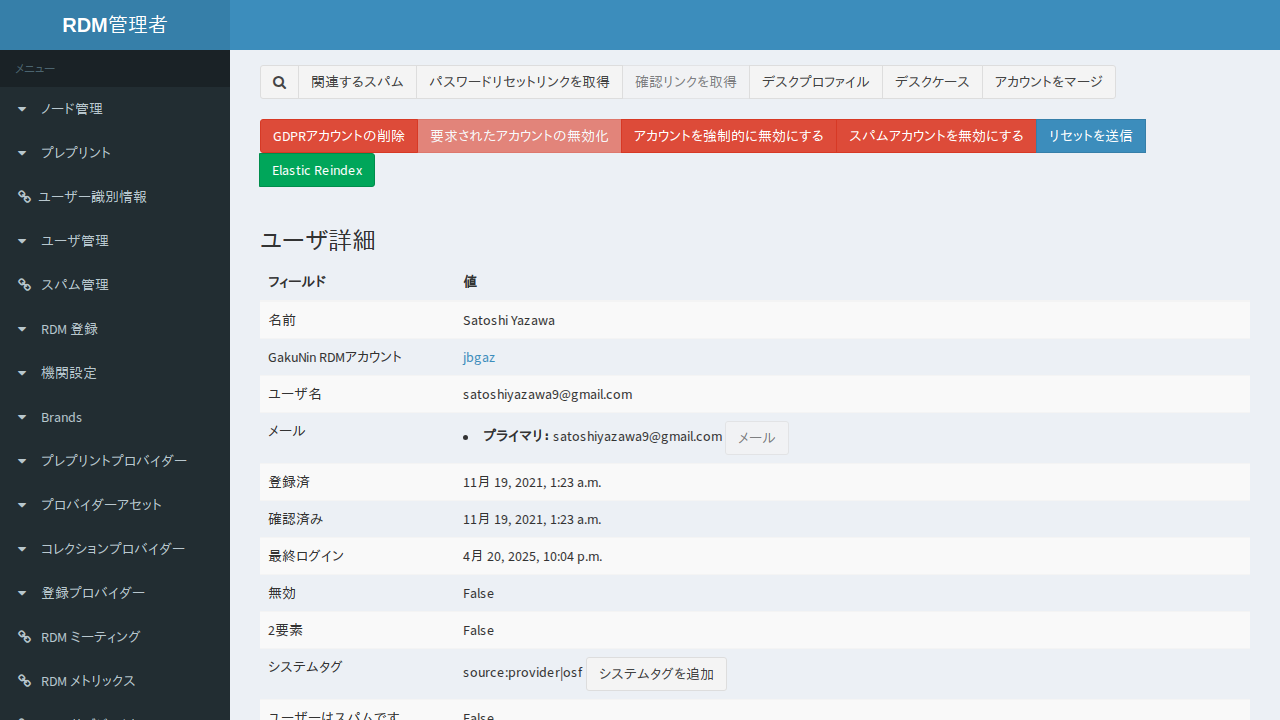

In [21]:
async def _step(page):
    await page.locator('//input[@name = "guid"]').fill(search_user_by_id)
    await page.locator('//input[@type = "submit"]').click()

    await expect(page.locator(f'//td[contains(text(), "{search_user_name}")]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 「ユーザ管理」から「ユーザ管理」を選択する。

「ユーザ検索」画面が表示される

Start epoch: 1745187482.3276649 seconds


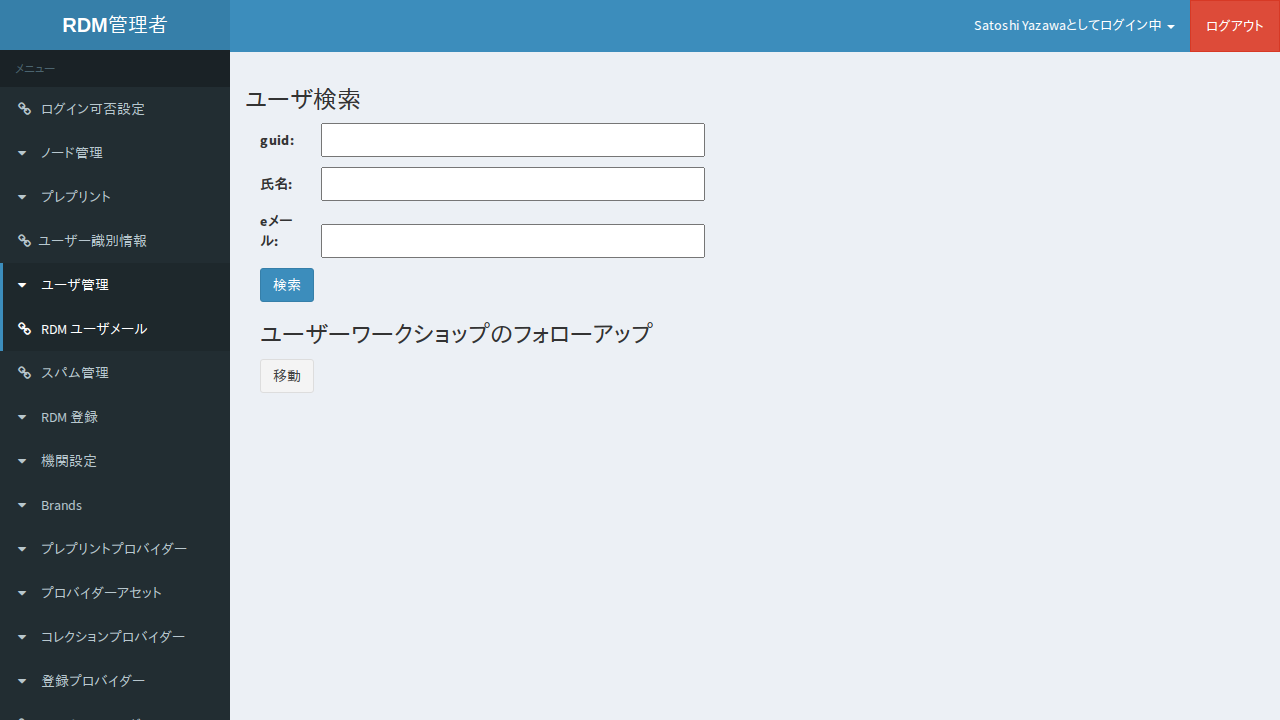

In [22]:
async def _step(page):
    await page.locator('//a[@href = "#collapseUsers"]').click()
    await page.locator('//a[@href = "/users/" and contains(span/text(), "ユーザ管理")]').click()

    await expect(page.locator('//input[@name = "guid"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 「ユーザ検索」画面の氏名欄へ (ユーザー名の一部) と入力し、「検索」ボタンを押下する

該当のユーザーが含まれるリストが表示される。

Start epoch: 1745187482.7742765 seconds


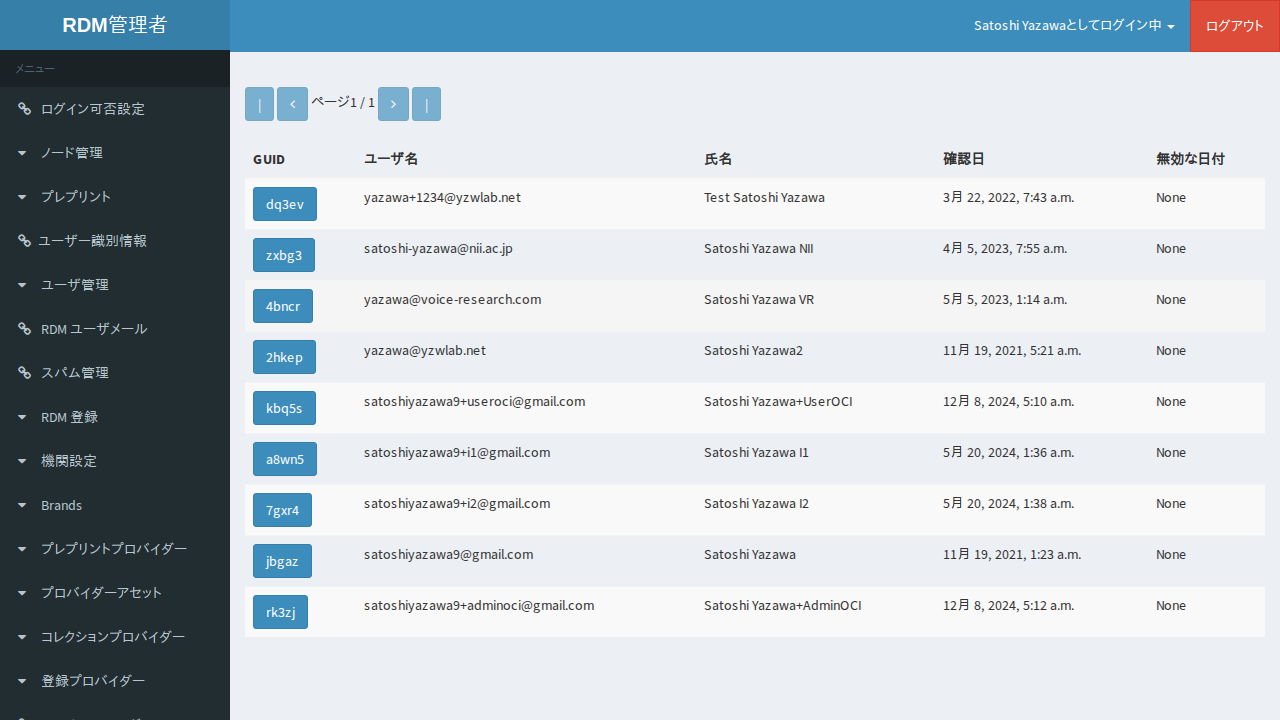

In [23]:
async def _step(page):
    await page.locator('//input[@name = "name"]').fill(search_user_by_name)
    await page.locator('//input[@type = "submit"]').click()

    await expect(page.locator(f'//a[contains(text(), "{search_user_by_id}")]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## (検索対象のユーザーID)をクリックする

該当のユーザーが表示される。

Start epoch: 1745187483.3465424 seconds


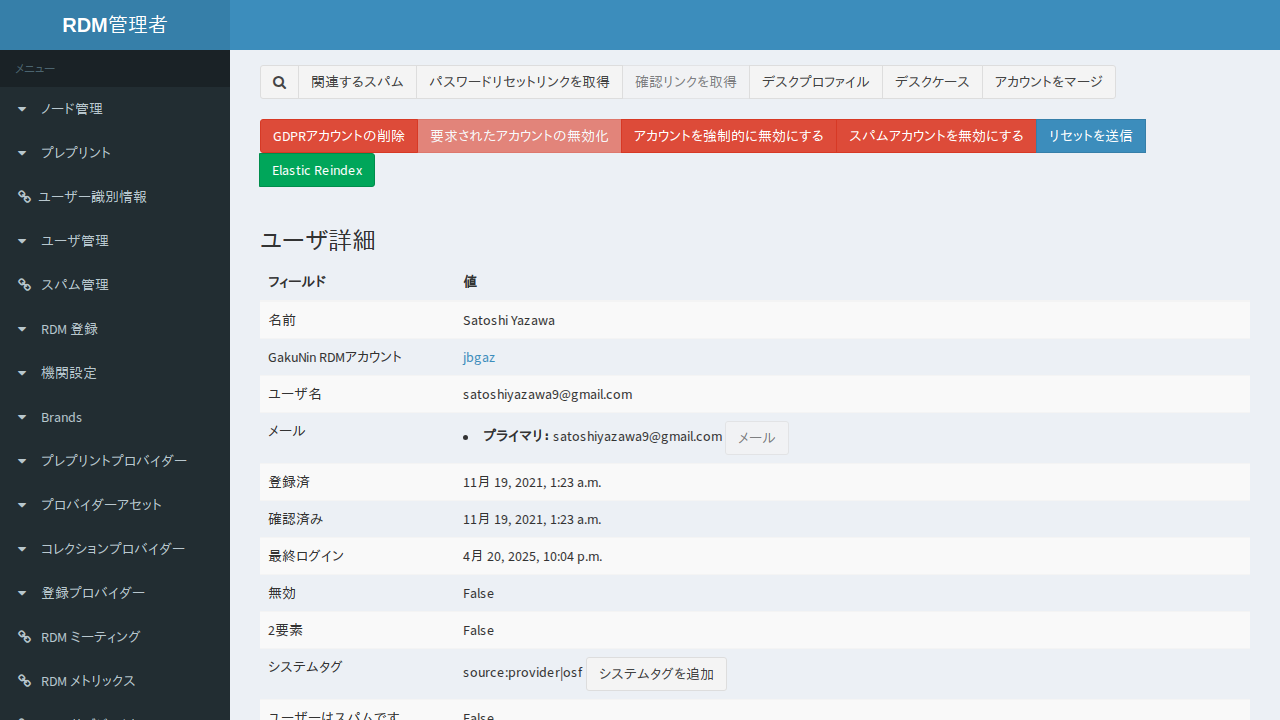

In [ ]:
# search_user_name = 'Satoshi Yazawa'
# search_user_by_id = 'jbgaz'
# search_user_by_name = 'Satoshi'
# search_user_by_email = 'satoshiyazawa9@example.com'

async def _step(page):
    await page.locator(f'//a[contains(text(), "{search_user_by_id}")]').click()

    await expect(page.locator(f'//td[contains(text(), "{search_user_name}")]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 「ユーザ管理」から「ユーザ管理」を選択する。

「ユーザ検索」画面が表示される

Start epoch: 1745187483.81077 seconds


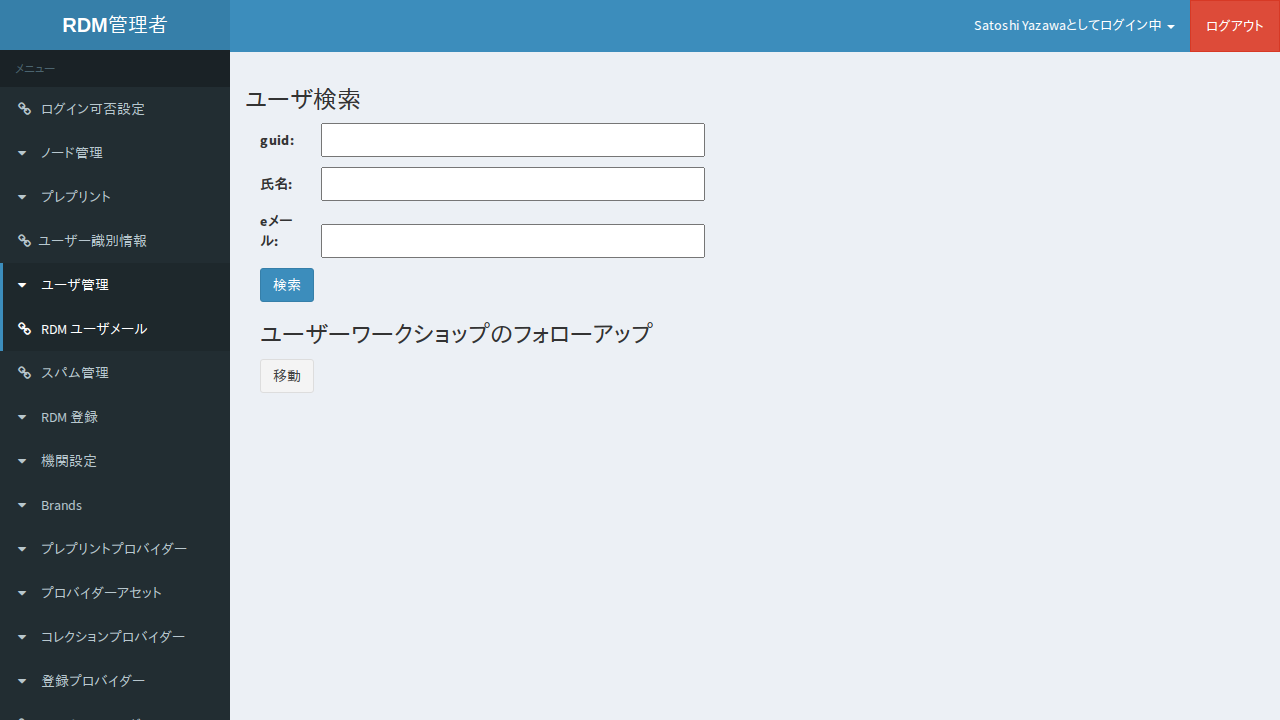

In [25]:
async def _step(page):
    await page.locator('//a[@href = "#collapseUsers"]').click()
    await page.locator('//a[@href = "/users/" and contains(span/text(), "ユーザ管理")]').click()

    await expect(page.locator('//input[@name = "guid"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 「ユーザ検索」画面のeメール欄へ (実在するユーザーメールアドレス) と入力し、「検索」ボタンを押下する

該当のユーザーが表示される。

Start epoch: 1745187484.2897222 seconds


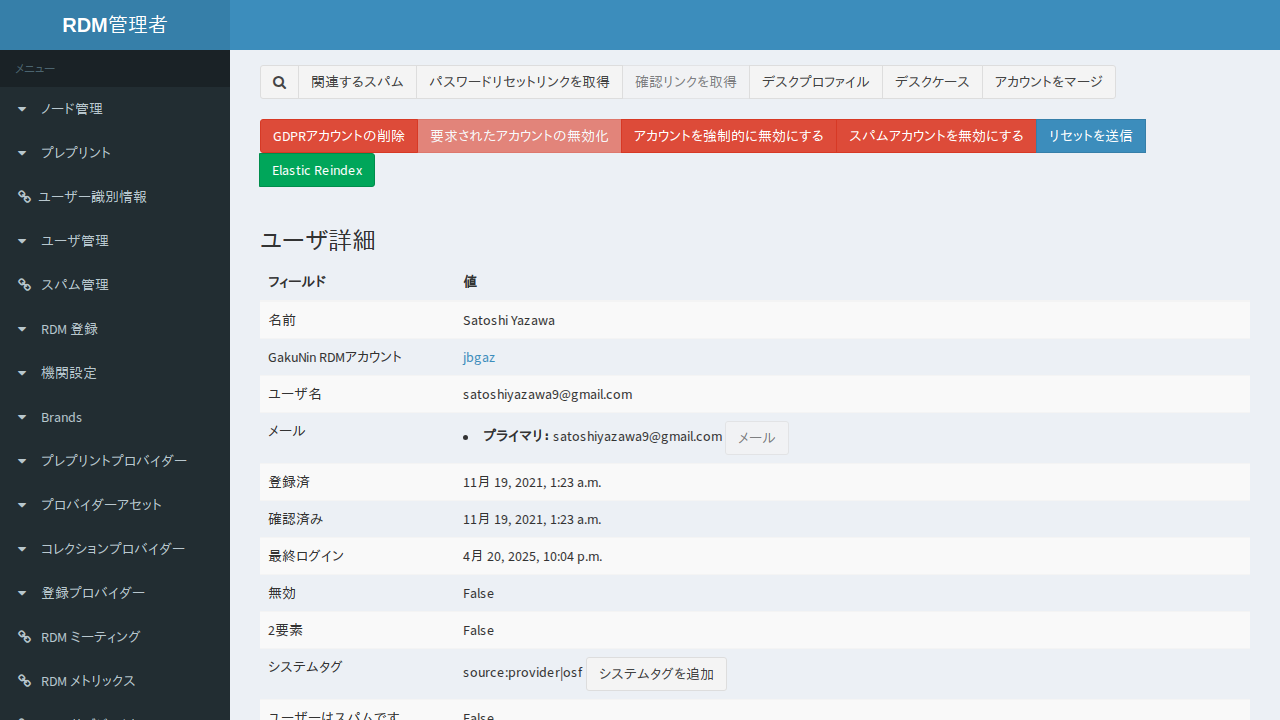

In [26]:
async def _step(page):
    await page.locator('//input[@name = "email"]').fill(search_user_by_email)
    await page.locator('//input[@type = "submit"]').click()

    await expect(page.locator(f'//td[contains(text(), "{search_user_name}")]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

終了処理を実施。

In [27]:
await finish_pw_context()

Video: /tmp/tmpnx_qts2u/video-1.webm
HAR: /tmp/tmpnx_qts2u/har.zip


In [28]:
!rm -fr {work_dir}